## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [8]:
import os
import keras
import itertools
# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [10]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [11]:
"""Code Here
設定超參數
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0.7, 0.9, 0.95, 0.99]

In [12]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for lr, momentum in itertools.product(LEARNING_RATE, MOMENTUM):
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f, Momentum = %.2f" % (lr, momentum))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=momentum)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s-momemtum-%s" % (str(lr), str(momentum))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

W0720 17:21:55.291365 13252 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0720 17:21:55.300557 13252 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0720 17:21:55.442803 13252 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



Experiment with LR = 0.100000, Momentum = 0.70
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


W0720 17:21:55.719123 13252 deprecation.py:323] From C:\Users\weihs\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 15s 306us/step - loss: 2.1402 - acc: 0.2142 - val_loss: 1.9847 - val_acc: 0.2908
Epoch 2/50
50000/50000 [==============================] - 13s 260us/step - loss: 1.8850 - acc: 0.3180 - val_loss: 1.9128 - val_acc: 0.3161
Epoch 3/50
50000/50000 [==============================] - 13s 250us/step - loss: 1.7581 - acc: 0.3657 - val_loss: 1.7427 - val_acc: 0.3662
Epoch 4/50
50000/50000 [==============================] - 13s 268us/step - loss: 1.6965 - acc: 0.3928 - val_loss: 1.7623 - val_acc: 0.3920
Epoch 5/50
50000/50000 [==============================] - 14s 281us/step - loss: 1.6352 - acc: 0.4144 - val_loss: 1.6316 - val_acc: 0.4143
Epoch 6/50
50000/50000 [==============================] - 14s 284us/step - loss: 1.5884 - acc: 0.4281 - val_loss: 1.6152 - val_acc: 0.4166
Epoch 7/50
50000/50000 [==============================] - 14s 271us/step - loss: 1.5430 - acc: 0.4483 - val_loss: 1.

50000/50000 [==============================] - 14s 289us/step - loss: 2.2166 - acc: 0.1653 - val_loss: 2.0254 - val_acc: 0.2173
Epoch 2/50
50000/50000 [==============================] - 14s 275us/step - loss: 2.0068 - acc: 0.2391 - val_loss: 1.9254 - val_acc: 0.2720
Epoch 3/50
50000/50000 [==============================] - 24s 479us/step - loss: 1.9029 - acc: 0.2913 - val_loss: 1.8776 - val_acc: 0.3081
Epoch 4/50
50000/50000 [==============================] - 18s 353us/step - loss: 1.7900 - acc: 0.3516 - val_loss: 1.8689 - val_acc: 0.3327
Epoch 5/50
50000/50000 [==============================] - 14s 277us/step - loss: 1.7228 - acc: 0.3828 - val_loss: 1.6732 - val_acc: 0.3962
Epoch 6/50
50000/50000 [==============================] - 14s 279us/step - loss: 1.6838 - acc: 0.3953 - val_loss: 1.9146 - val_acc: 0.3295
Epoch 7/50
50000/50000 [==============================] - 14s 281us/step - loss: 1.6676 - acc: 0.3998 - val_loss: 1.6994 - val_acc: 0.3897
Epoch 8/50
50000/50000 [==============

50000/50000 [==============================] - 14s 288us/step - loss: 2.3622 - acc: 0.1349 - val_loss: 2.1183 - val_acc: 0.1657
Epoch 2/50
50000/50000 [==============================] - 14s 278us/step - loss: 2.2768 - acc: 0.1198 - val_loss: 2.3036 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 14s 278us/step - loss: 2.3043 - acc: 0.0992 - val_loss: 2.3044 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 14s 278us/step - loss: 2.3045 - acc: 0.0997 - val_loss: 2.3035 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 14s 278us/step - loss: 2.3043 - acc: 0.1010 - val_loss: 2.3036 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 14s 279us/step - loss: 2.3040 - acc: 0.1000 - val_loss: 2.3043 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 14s 279us/step - loss: 2.3039 - acc: 0.0982 - val_loss: 2.3037 - val_acc: 0.1000
Epoch 8/50
50000/50000 [==============

Epoch 2/50
50000/50000 [==============================] - 14s 279us/step - loss: 2.3066 - acc: 0.1009 - val_loss: 2.3075 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 14s 278us/step - loss: 2.3065 - acc: 0.0999 - val_loss: 2.3050 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 14s 281us/step - loss: 2.3085 - acc: 0.0989 - val_loss: 2.3048 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 14s 274us/step - loss: 2.3071 - acc: 0.1010 - val_loss: 2.3075 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 14s 278us/step - loss: 2.3071 - acc: 0.0983 - val_loss: 2.3053 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 14s 274us/step - loss: 2.3059 - acc: 0.1013 - val_loss: 2.3044 - val_acc: 0.1000
Epoch 8/50
50000/50000 [==============================] - 14s 278us/step - loss: 2.3069 - acc: 0.1013 - val_loss: 2.3091 - val_acc: 0.1000
Epoch 9/50
50000/50000 [===

Epoch 3/50
50000/50000 [==============================] - 23s 468us/step - loss: 1.6797 - acc: 0.4075 - val_loss: 1.7874 - val_acc: 0.3521
Epoch 4/50
50000/50000 [==============================] - 23s 464us/step - loss: 1.6281 - acc: 0.4243 - val_loss: 1.6590 - val_acc: 0.4079
Epoch 5/50
50000/50000 [==============================] - 23s 463us/step - loss: 1.5787 - acc: 0.4422 - val_loss: 1.7408 - val_acc: 0.3864
Epoch 6/50
50000/50000 [==============================] - 23s 466us/step - loss: 1.5488 - acc: 0.4540 - val_loss: 1.5949 - val_acc: 0.4251
Epoch 7/50
50000/50000 [==============================] - 23s 465us/step - loss: 1.5137 - acc: 0.4648 - val_loss: 1.6077 - val_acc: 0.4127
Epoch 8/50
50000/50000 [==============================] - 23s 469us/step - loss: 1.4841 - acc: 0.4780 - val_loss: 1.7050 - val_acc: 0.3969
Epoch 9/50
50000/50000 [==============================] - 23s 468us/step - loss: 1.4543 - acc: 0.4856 - val_loss: 1.5938 - val_acc: 0.4349
Epoch 10/50
50000/50000 [==

Epoch 4/50
50000/50000 [==============================] - 23s 462us/step - loss: 1.4938 - acc: 0.4718 - val_loss: 1.6086 - val_acc: 0.4353
Epoch 5/50
50000/50000 [==============================] - 23s 457us/step - loss: 1.4410 - acc: 0.4884 - val_loss: 1.4881 - val_acc: 0.4734
Epoch 6/50
50000/50000 [==============================] - 23s 469us/step - loss: 1.3954 - acc: 0.5027 - val_loss: 1.5042 - val_acc: 0.4600
Epoch 7/50
50000/50000 [==============================] - 23s 463us/step - loss: 1.3616 - acc: 0.5169 - val_loss: 1.6155 - val_acc: 0.4379
Epoch 8/50
50000/50000 [==============================] - 24s 471us/step - loss: 1.3343 - acc: 0.5257 - val_loss: 1.5898 - val_acc: 0.4369
Epoch 9/50
50000/50000 [==============================] - 23s 460us/step - loss: 1.2963 - acc: 0.5440 - val_loss: 1.3926 - val_acc: 0.5064
Epoch 10/50
50000/50000 [==============================] - 23s 466us/step - loss: 1.2700 - acc: 0.5491 - val_loss: 1.3816 - val_acc: 0.5092
Epoch 11/50
50000/50000 [=

Epoch 5/50
50000/50000 [==============================] - 15s 295us/step - loss: 1.4075 - acc: 0.4990 - val_loss: 1.4824 - val_acc: 0.4693
Epoch 6/50
50000/50000 [==============================] - 15s 299us/step - loss: 1.3641 - acc: 0.5129 - val_loss: 1.4069 - val_acc: 0.5046
Epoch 7/50
50000/50000 [==============================] - 14s 275us/step - loss: 1.3317 - acc: 0.5263 - val_loss: 1.5127 - val_acc: 0.4708
Epoch 8/50
50000/50000 [==============================] - 14s 270us/step - loss: 1.2962 - acc: 0.5375 - val_loss: 1.3916 - val_acc: 0.5016
Epoch 9/50
50000/50000 [==============================] - 14s 285us/step - loss: 1.2671 - acc: 0.5488 - val_loss: 1.4216 - val_acc: 0.4922
Epoch 10/50
50000/50000 [==============================] - 14s 274us/step - loss: 1.2385 - acc: 0.5575 - val_loss: 1.4140 - val_acc: 0.5019
Epoch 11/50
50000/50000 [==============================] - 13s 265us/step - loss: 1.2083 - acc: 0.5705 - val_loss: 1.3501 - val_acc: 0.5223
Epoch 12/50
50000/50000 [

50000/50000 [==============================] - 14s 286us/step - loss: 1.4301 - acc: 0.4903 - val_loss: 1.4697 - val_acc: 0.4795
Epoch 6/50
50000/50000 [==============================] - 14s 282us/step - loss: 1.3929 - acc: 0.5031 - val_loss: 1.4619 - val_acc: 0.4815
Epoch 7/50
50000/50000 [==============================] - 14s 271us/step - loss: 1.3607 - acc: 0.5158 - val_loss: 1.4796 - val_acc: 0.4783
Epoch 8/50
50000/50000 [==============================] - 14s 270us/step - loss: 1.3402 - acc: 0.5194 - val_loss: 1.4263 - val_acc: 0.4903
Epoch 9/50
50000/50000 [==============================] - 14s 275us/step - loss: 1.3080 - acc: 0.5345 - val_loss: 1.4289 - val_acc: 0.5016
Epoch 10/50
50000/50000 [==============================] - 14s 284us/step - loss: 1.2833 - acc: 0.5408 - val_loss: 1.4308 - val_acc: 0.4978
Epoch 11/50
50000/50000 [==============================] - 14s 282us/step - loss: 1.2752 - acc: 0.5463 - val_loss: 1.4633 - val_acc: 0.4828
Epoch 12/50
50000/50000 [===========

50000/50000 [==============================] - 9s 175us/step - loss: 1.8683 - acc: 0.3456 - val_loss: 1.8537 - val_acc: 0.3508
Epoch 6/50
50000/50000 [==============================] - 11s 216us/step - loss: 1.8392 - acc: 0.3553 - val_loss: 1.8324 - val_acc: 0.3576
Epoch 7/50
50000/50000 [==============================] - 10s 210us/step - loss: 1.8149 - acc: 0.3640 - val_loss: 1.8087 - val_acc: 0.3573
Epoch 8/50
50000/50000 [==============================] - 10s 202us/step - loss: 1.7946 - acc: 0.3708 - val_loss: 1.7914 - val_acc: 0.3712- acc: 0.37
Epoch 9/50
50000/50000 [==============================] - 10s 202us/step - loss: 1.7763 - acc: 0.3782 - val_loss: 1.7745 - val_acc: 0.3707
Epoch 10/50
50000/50000 [==============================] - 10s 207us/step - loss: 1.7598 - acc: 0.3850 - val_loss: 1.7658 - val_acc: 0.3757
Epoch 11/50
50000/50000 [==============================] - 10s 203us/step - loss: 1.7441 - acc: 0.3909 - val_loss: 1.7485 - val_acc: 0.3790
Epoch 12/50
50000/50000 [=

50000/50000 [==============================] - 16s 322us/step - loss: 1.7215 - acc: 0.3997 - val_loss: 1.7040 - val_acc: 0.4086
Epoch 6/50
50000/50000 [==============================] - 15s 303us/step - loss: 1.6871 - acc: 0.4124 - val_loss: 1.6722 - val_acc: 0.4174
Epoch 7/50
50000/50000 [==============================] - 15s 301us/step - loss: 1.6566 - acc: 0.4220 - val_loss: 1.6466 - val_acc: 0.4249
Epoch 8/50
50000/50000 [==============================] - 15s 302us/step - loss: 1.6298 - acc: 0.4319 - val_loss: 1.6226 - val_acc: 0.4326
Epoch 9/50
50000/50000 [==============================] - 15s 305us/step - loss: 1.6053 - acc: 0.4398 - val_loss: 1.6020 - val_acc: 0.4382
Epoch 10/50
50000/50000 [==============================] - 15s 301us/step - loss: 1.5828 - acc: 0.4482 - val_loss: 1.5821 - val_acc: 0.4454
Epoch 11/50
50000/50000 [==============================] - 15s 304us/step - loss: 1.5621 - acc: 0.4557 - val_loss: 1.5715 - val_acc: 0.4528
Epoch 12/50
50000/50000 [===========

Epoch 6/50
50000/50000 [==============================] - 14s 273us/step - loss: 1.5815 - acc: 0.4458 - val_loss: 1.5834 - val_acc: 0.4409
Epoch 7/50
50000/50000 [==============================] - 13s 268us/step - loss: 1.5482 - acc: 0.4569 - val_loss: 1.5498 - val_acc: 0.4537
Epoch 8/50
50000/50000 [==============================] - 13s 266us/step - loss: 1.5200 - acc: 0.4672 - val_loss: 1.5337 - val_acc: 0.4687
Epoch 9/50
50000/50000 [==============================] - 15s 298us/step - loss: 1.4924 - acc: 0.4776 - val_loss: 1.5201 - val_acc: 0.4652
Epoch 10/50
50000/50000 [==============================] - 15s 299us/step - loss: 1.4676 - acc: 0.4853 - val_loss: 1.4930 - val_acc: 0.4773
Epoch 11/50
50000/50000 [==============================] - 13s 269us/step - loss: 1.4444 - acc: 0.4948 - val_loss: 1.5024 - val_acc: 0.4691
Epoch 12/50
50000/50000 [==============================] - 12s 250us/step - loss: 1.4224 - acc: 0.5009 - val_loss: 1.4681 - val_acc: 0.4812
Epoch 13/50
50000/50000 

50000/50000 [==============================] - 10s 203us/step - loss: 1.4126 - acc: 0.5010 - val_loss: 1.4507 - val_acc: 0.4841
Epoch 7/50
50000/50000 [==============================] - 10s 201us/step - loss: 1.3739 - acc: 0.5128 - val_loss: 1.4162 - val_acc: 0.4932
Epoch 8/50
50000/50000 [==============================] - 10s 202us/step - loss: 1.3392 - acc: 0.5266 - val_loss: 1.4108 - val_acc: 0.4976
Epoch 9/50
50000/50000 [==============================] - 10s 201us/step - loss: 1.3053 - acc: 0.5388 - val_loss: 1.4027 - val_acc: 0.4975
Epoch 10/50
50000/50000 [==============================] - 10s 201us/step - loss: 1.2734 - acc: 0.5518 - val_loss: 1.3742 - val_acc: 0.5146
Epoch 11/50
50000/50000 [==============================] - 10s 201us/step - loss: 1.2476 - acc: 0.5584 - val_loss: 1.4050 - val_acc: 0.5021
Epoch 12/50
50000/50000 [==============================] - 10s 202us/step - loss: 1.2291 - acc: 0.5650 - val_loss: 1.3590 - val_acc: 0.5178
Epoch 13/50
50000/50000 [==========

Epoch 7/50
50000/50000 [==============================] - 10s 201us/step - loss: 2.1442 - acc: 0.2298 - val_loss: 2.1319 - val_acc: 0.2397
Epoch 8/50
50000/50000 [==============================] - 10s 199us/step - loss: 2.1276 - acc: 0.2369 - val_loss: 2.1159 - val_acc: 0.2474
Epoch 9/50
50000/50000 [==============================] - 10s 202us/step - loss: 2.1119 - acc: 0.2439 - val_loss: 2.1009 - val_acc: 0.2543
Epoch 10/50
50000/50000 [==============================] - 10s 204us/step - loss: 2.0971 - acc: 0.2502 - val_loss: 2.0868 - val_acc: 0.2592
Epoch 11/50
50000/50000 [==============================] - 10s 203us/step - loss: 2.0831 - acc: 0.2565 - val_loss: 2.0734 - val_acc: 0.2643
Epoch 12/50
50000/50000 [==============================] - 10s 203us/step - loss: 2.0698 - acc: 0.2611 - val_loss: 2.0608 - val_acc: 0.2694
Epoch 13/50
50000/50000 [==============================] - 10s 202us/step - loss: 2.0573 - acc: 0.2654 - val_loss: 2.0489 - val_acc: 0.2749
Epoch 14/50
50000/50000

50000/50000 [==============================] - 11s 213us/step - loss: 1.9684 - acc: 0.3163 - val_loss: 1.9555 - val_acc: 0.3222
Epoch 8/50
50000/50000 [==============================] - 10s 203us/step - loss: 1.9463 - acc: 0.3238 - val_loss: 1.9351 - val_acc: 0.3284
Epoch 9/50
50000/50000 [==============================] - 10s 203us/step - loss: 1.9273 - acc: 0.3308 - val_loss: 1.9173 - val_acc: 0.3316
Epoch 10/50
50000/50000 [==============================] - 10s 206us/step - loss: 1.9107 - acc: 0.3376 - val_loss: 1.9021 - val_acc: 0.3344
Epoch 11/50
50000/50000 [==============================] - 10s 208us/step - loss: 1.8959 - acc: 0.3419 - val_loss: 1.8887 - val_acc: 0.3412
Epoch 12/50
50000/50000 [==============================] - 10s 202us/step - loss: 1.8830 - acc: 0.3463 - val_loss: 1.8767 - val_acc: 0.3457
Epoch 13/50
50000/50000 [==============================] - 10s 204us/step - loss: 1.8711 - acc: 0.3503 - val_loss: 1.8658 - val_acc: 0.3461
Epoch 14/50
50000/50000 [=========

Epoch 8/50
50000/50000 [==============================] - 10s 202us/step - loss: 1.8816 - acc: 0.3471 - val_loss: 1.8731 - val_acc: 0.3471
Epoch 9/50
50000/50000 [==============================] - 11s 213us/step - loss: 1.8638 - acc: 0.3524 - val_loss: 1.8558 - val_acc: 0.3574
Epoch 10/50
50000/50000 [==============================] - 10s 208us/step - loss: 1.8484 - acc: 0.3572 - val_loss: 1.8416 - val_acc: 0.3622
Epoch 11/50
50000/50000 [==============================] - 10s 208us/step - loss: 1.8350 - acc: 0.3605 - val_loss: 1.8275 - val_acc: 0.3639
Epoch 12/50
50000/50000 [==============================] - 14s 287us/step - loss: 1.8214 - acc: 0.3659 - val_loss: 1.8160 - val_acc: 0.3696
Epoch 13/50
50000/50000 [==============================] - 12s 240us/step - loss: 1.8095 - acc: 0.3707 - val_loss: 1.8055 - val_acc: 0.3734
Epoch 14/50
50000/50000 [==============================] - 12s 249us/step - loss: 1.7982 - acc: 0.3741 - val_loss: 1.7955 - val_acc: 0.3726
Epoch 15/50
50000/5000

Epoch 9/50
50000/50000 [==============================] - 27s 540us/step - loss: 1.6402 - acc: 0.4272 - val_loss: 1.6313 - val_acc: 0.4265
Epoch 10/50
50000/50000 [==============================] - 27s 530us/step - loss: 1.6179 - acc: 0.4336 - val_loss: 1.6147 - val_acc: 0.4332
Epoch 11/50
50000/50000 [==============================] - 27s 542us/step - loss: 1.5941 - acc: 0.4425 - val_loss: 1.5919 - val_acc: 0.4428
Epoch 12/50
50000/50000 [==============================] - 27s 549us/step - loss: 1.5753 - acc: 0.4490 - val_loss: 1.5751 - val_acc: 0.4453
Epoch 13/50
50000/50000 [==============================] - 27s 545us/step - loss: 1.5568 - acc: 0.4567 - val_loss: 1.5637 - val_acc: 0.4503
Epoch 14/50
50000/50000 [==============================] - 28s 563us/step - loss: 1.5404 - acc: 0.4620 - val_loss: 1.5493 - val_acc: 0.4577
Epoch 15/50
50000/50000 [==============================] - 28s 563us/step - loss: 1.5252 - acc: 0.4658 - val_loss: 1.5375 - val_acc: 0.4562
Epoch 16/50
50000/500

Epoch 10/50
50000/50000 [==============================] - 28s 550us/step - loss: 2.2850 - acc: 0.1503 - val_loss: 2.2811 - val_acc: 0.1521
Epoch 11/50
50000/50000 [==============================] - 27s 545us/step - loss: 2.2809 - acc: 0.1550 - val_loss: 2.2773 - val_acc: 0.1569
Epoch 12/50
50000/50000 [==============================] - 28s 563us/step - loss: 2.2771 - acc: 0.1582 - val_loss: 2.2737 - val_acc: 0.1623
Epoch 13/50
50000/50000 [==============================] - 27s 540us/step - loss: 2.2736 - acc: 0.1612 - val_loss: 2.2703 - val_acc: 0.1661
Epoch 14/50
50000/50000 [==============================] - 28s 568us/step - loss: 2.2702 - acc: 0.1637 - val_loss: 2.2671 - val_acc: 0.1687
Epoch 15/50
50000/50000 [==============================] - 14s 287us/step - loss: 2.2670 - acc: 0.1664 - val_loss: 2.2641 - val_acc: 0.1708
Epoch 16/50
50000/50000 [==============================] - 15s 295us/step - loss: 2.2640 - acc: 0.1680 - val_loss: 2.2612 - val_acc: 0.1727
Epoch 17/50
50000/50

Epoch 11/50
50000/50000 [==============================] - 14s 278us/step - loss: 2.2097 - acc: 0.2129 - val_loss: 2.2052 - val_acc: 0.2206
Epoch 12/50
50000/50000 [==============================] - 13s 269us/step - loss: 2.2030 - acc: 0.2187 - val_loss: 2.1986 - val_acc: 0.2263
Epoch 13/50
50000/50000 [==============================] - 14s 279us/step - loss: 2.1964 - acc: 0.2237 - val_loss: 2.1921 - val_acc: 0.2305
Epoch 14/50
50000/50000 [==============================] - 14s 280us/step - loss: 2.1900 - acc: 0.2272 - val_loss: 2.1858 - val_acc: 0.2340
Epoch 15/50
50000/50000 [==============================] - 14s 280us/step - loss: 2.1838 - acc: 0.2310 - val_loss: 2.1797 - val_acc: 0.2361
Epoch 16/50
50000/50000 [==============================] - 14s 281us/step - loss: 2.1777 - acc: 0.2340 - val_loss: 2.1738 - val_acc: 0.2388
Epoch 17/50
50000/50000 [==============================] - 14s 279us/step - loss: 2.1718 - acc: 0.2365 - val_loss: 2.1679 - val_acc: 0.2411
Epoch 18/50
50000/50

Epoch 12/50
50000/50000 [==============================] - 24s 474us/step - loss: 2.1618 - acc: 0.2324 - val_loss: 2.1584 - val_acc: 0.2306
Epoch 13/50
50000/50000 [==============================] - 24s 471us/step - loss: 2.1525 - acc: 0.2371 - val_loss: 2.1492 - val_acc: 0.2335
Epoch 14/50
50000/50000 [==============================] - 24s 476us/step - loss: 2.1435 - acc: 0.2378 - val_loss: 2.1405 - val_acc: 0.2368
Epoch 15/50
50000/50000 [==============================] - 23s 466us/step - loss: 2.1349 - acc: 0.2424 - val_loss: 2.1321 - val_acc: 0.2388
Epoch 16/50
50000/50000 [==============================] - 23s 462us/step - loss: 2.1265 - acc: 0.2437 - val_loss: 2.1240 - val_acc: 0.2410
Epoch 17/50
50000/50000 [==============================] - 23s 464us/step - loss: 2.1185 - acc: 0.2472 - val_loss: 2.1162 - val_acc: 0.2447
Epoch 18/50
50000/50000 [==============================] - 23s 468us/step - loss: 2.1108 - acc: 0.2491 - val_loss: 2.1086 - val_acc: 0.2477
Epoch 19/50
50000/50

50000/50000 [==============================] - 13s 267us/step - loss: 1.9096 - acc: 0.3293 - val_loss: 1.9053 - val_acc: 0.3306
Epoch 13/50
50000/50000 [==============================] - 15s 293us/step - loss: 1.8957 - acc: 0.3336 - val_loss: 1.8926 - val_acc: 0.3365
Epoch 14/50
50000/50000 [==============================] - 14s 289us/step - loss: 1.8834 - acc: 0.3390 - val_loss: 1.8812 - val_acc: 0.3404
Epoch 15/50
50000/50000 [==============================] - 15s 291us/step - loss: 1.8726 - acc: 0.3422 - val_loss: 1.8711 - val_acc: 0.3437
Epoch 16/50
50000/50000 [==============================] - 15s 296us/step - loss: 1.8626 - acc: 0.3464 - val_loss: 1.8614 - val_acc: 0.3494
Epoch 17/50
50000/50000 [==============================] - 15s 295us/step - loss: 1.8534 - acc: 0.3508 - val_loss: 1.8532 - val_acc: 0.3495
Epoch 18/50
50000/50000 [==============================] - 15s 292us/step - loss: 1.8450 - acc: 0.3553 - val_loss: 1.8448 - val_acc: 0.3553
Epoch 19/50
50000/50000 [=======

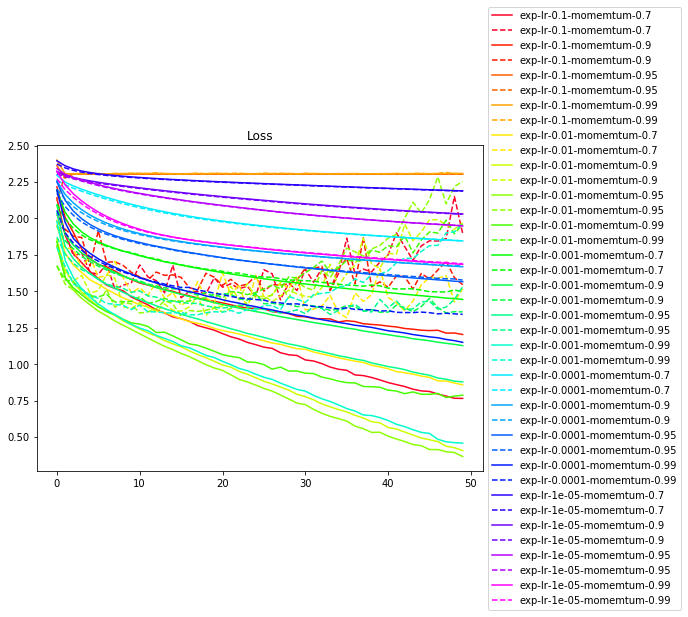

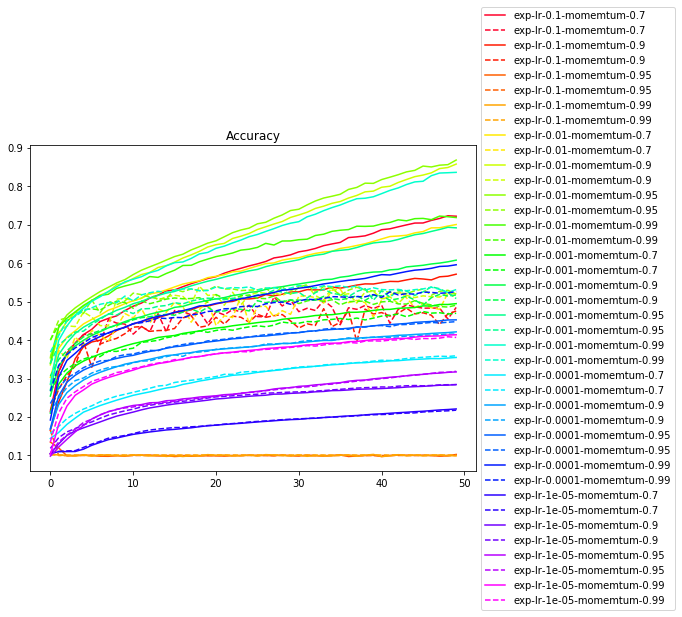

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
    
NUM_COLORS = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()